In [1]:
import pandas as pd
twinty_molecule=[
    'MDEC-23',
    'minsOH',
    'BCUTp-1h',
    'C1SP2',
    'maxdO',
    'XLogP',
    'ATSm5',
    'maxHBd',
    'maxssO',
    'SHBint10',
    'SPC-6',
    'BCUTp-1l',
    'maxsF',
    'minHBa',
    'MDEO-12',
    'ATSc5',
    'maxHBint5',
    'ATSc1',
    'gmin',
    'SHBint7'
]
x_s=pd.read_excel(io='Molecular_Descriptor.xlsx',usecols=twinty_molecule)
x_s.head()

,ATSc1,ATSc5,ATSm5,BCUTp-1l,BCUTp-1h,C1SP2,SPC-6,SHBint7,SHBint10,minHBa,minsOH,maxHBd,maxHBint5,maxdO,maxssO,maxsF,gmin,MDEC-23,MDEO-12,XLogP
0,0.460175,-0.080148,58.060335,5.245435,13.254859,0,9.019729,0.000000,0.000000,-1.331303,9.968948,0.469126,3.092949,0.0,6.593009,0.0,-1.331303,28.277932,0.269680,4.666
1,0.460175,-0.080148,60.060335,5.256770,13.617609,0,9.255431,0.000000,0.000000,-1.378628,10.058948,0.449126,2.997752,0.0,6.674642,0.0,-1.378628,31.076748,0.269680,5.804
2,0.519350,-0.059065,60.392427,4.910140,13.393453,0,9.760737,3.358891,9.842059,-1.608354,9.752886,0.516534,3.125957,0.0,6.502751,0.0,-1.608354,30.901064,0.495846,2.964
3,0.460206,-0.079743,57.728243,5.239956,13.079547,0,8.706054,0.000000,0.000000,-1.350874,10.025028,0.456486,3.022916,0.0,6.622142,0.0,-1.350874,30.570001,0.269680,6.015
4,0.462912,-0.069664,57.728243,5.238827,13.043454,0,8.706054,0.000000,0.000000,-1.449689,9.993342,0.473631,3.103616,0.0,6.552810,0.0,-1.449689,30.570001,0.269680,4.462


In [2]:
x_predict=pd.read_excel(io='Molecular_Descriptor.xlsx',usecols=twinty_molecule,sheet_name='test')
x_predict.head()

,ATSc1,ATSc5,ATSm5,BCUTp-1l,BCUTp-1h,C1SP2,SPC-6,SHBint7,SHBint10,minHBa,minsOH,maxHBd,maxHBint5,maxdO,maxssO,maxsF,gmin,MDEC-23,MDEO-12,XLogP
0,0.835565,0.287640,87.750948,4.877529,12.729807,0,17.871586,6.40386,17.09696,5.326938,9.793792,0.514285,0.0,13.739923,6.281369,0.000000,-5.978139,44.466435,1.867188,2.526
1,0.398690,0.004507,48.992552,3.924776,12.948458,1,9.405315,0.00000,0.00000,5.996806,8.828071,0.700035,0.0,10.760269,5.996806,0.000000,-0.971069,37.917748,0.303270,3.681
2,0.550993,0.130651,54.099113,3.925043,13.017161,1,10.184924,0.00000,0.00000,5.369229,8.860576,0.695591,0.0,10.802321,6.059306,0.000000,-0.981303,39.275746,0.544033,3.710
3,0.464480,0.079973,52.681420,3.924751,12.942770,1,10.155509,0.00000,0.00000,5.837639,8.819839,0.702586,0.0,10.757139,5.837639,13.844825,-1.006229,39.275746,0.303270,3.586
4,0.336316,0.028317,58.810443,3.927229,13.576771,1,10.155509,0.00000,0.00000,-1.360925,8.839644,0.694613,0.0,10.776944,0.000000,13.958899,-1.360925,39.275746,0.000000,3.978


In [3]:
y_s=pd.read_excel(io='ERα_activity.xlsx',usecols=['pIC50'])
y_s.head()

,pIC50
0,8.602060
1,8.124939
2,8.508638
3,8.408935
4,8.130768


In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y_s,test_size=0.3,random_state=0)


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### R2评价指标

In [6]:
def R_squared(y, y_pred):
  print(y.shape,y_pred.shape)
  residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
  total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
  r2 = tf.subtract(1.0, tf.math.divide(residual, total))
  return r2

### bp神经网络

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_32 (Dense)            (None, 80)                1680      
                                                                 
 dense_33 (Dense)            (None, 80)                6480      
                                                                 
 dense_34 (Dense)            (None, 80)                6480      
                                                                 
 dense_35 (Dense)            (None, 1)                 81        
                                                                 
Total params: 14,721
Trainable params: 14,721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
44/44 [==============================] - 1s

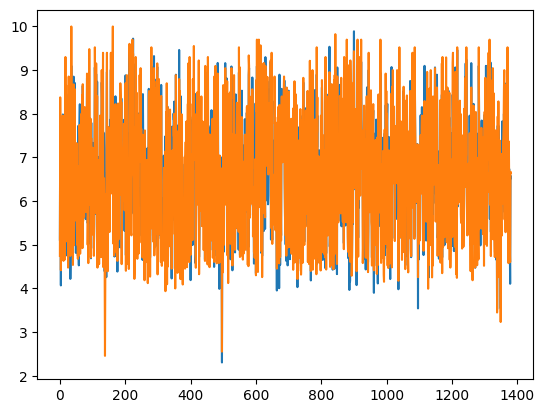

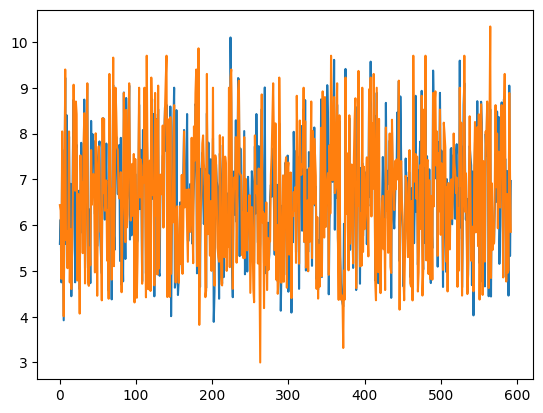

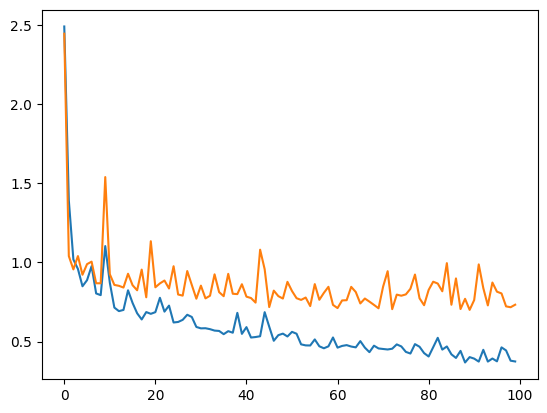

2/2 [==============================] - 0s 3ms/step


In [17]:
x=np.array(x_s)
y=np.array(y_s)
x.shape,y.shape

input_data=tf.keras.Input(shape=(20,))
neural_networks_1=tf.keras.layers.Dense(80,activation='relu')(input_data)
neural_networks_2=tf.keras.layers.Dense(80,activation='relu')(neural_networks_1)
neural_networks_3=tf.keras.layers.Dense(80,activation='relu')(neural_networks_2)
output_y=tf.keras.layers.Dense(1)(neural_networks_3)

model_neural_networks=tf.keras.Model(inputs=input_data,outputs=output_y)
model_neural_networks.summary()
model_neural_networks.compile(optimizer='adam',loss='MSE')
answer=model_neural_networks.fit(x=x_train,y=y_train,epochs=100,validation_data=(x_test,y_test))
y_out=model_neural_networks.predict(x=x_train)
y_out_test=model_neural_networks.predict(x=x_test)
print("训练集的R2",R_squared(y_train,y_out))
print("测试集的R2",R_squared(y_test,y_out_test))
plt.plot(y_out)
plt.plot(np.array(y_train))
plt.show()
plt.plot(y_out_test)
plt.plot(np.array(y_test))
plt.show()
plt.plot(answer.history.get("loss"))
plt.plot(answer.history.get("val_loss"))
plt.show()

model_neural_networks.save("model_neural_networks.h5")
y_predict=model_neural_networks.predict(x=x_predict)
np.savetxt('answer.txt',y_predict)

### 随机森林

C:\TempFiles\ipykernel_16388\1544053980.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train,y_train)


训练集mse 0.08421093898146643 R2 0.9583747820684045
测试集mse 0.5278616611573925 R2 0.739448224175637
18      6.436519
294     6.316053
1174    4.827333
1703    8.045757
512     5.871278
          ...   
1032    4.958607
372     5.016825
576     8.886057
211     7.050610
520     5.853252
Name: pIC50, Length: 593, dtype: float64


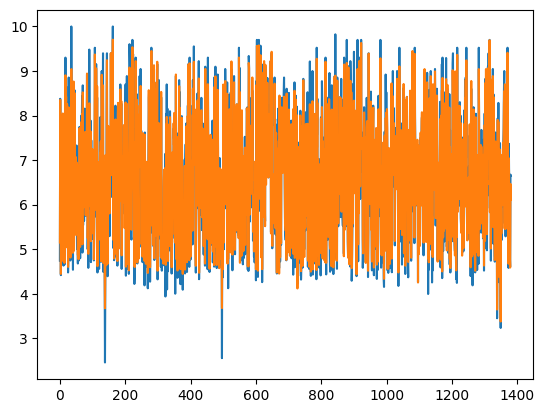

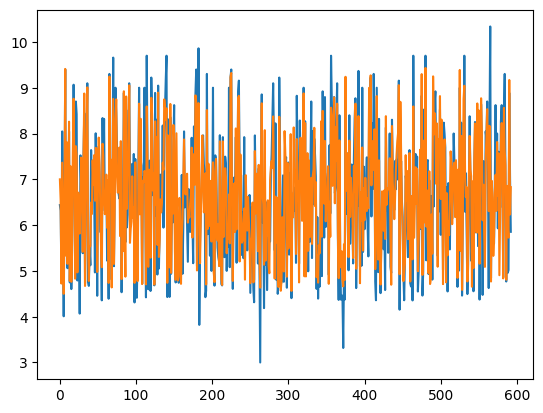

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

random_forest=RandomForestRegressor(random_state=0)
random_forest.fit(x_train,y_train)
forest_train_out=random_forest.predict(x_train)
forest_test_out=random_forest.predict(x_test)
print("训练集mse",mean_squared_error(y_train,forest_train_out),"R2",r2_score(y_train,forest_train_out))
print("测试集mse",mean_squared_error(y_test,forest_test_out),"R2",r2_score(y_test,forest_test_out))
train_out=random_forest.predict(x_train)
test_out=random_forest.predict(x_test)
print(y_test['pIC50'])
plt.plot(np.array(y_train['pIC50']))
plt.plot(train_out)
plt.show()
plt.plot(np.array(y_test['pIC50']))
plt.plot(test_out)
plt.show()
random_forest_predict=random_forest.predict(x_predict)
np.savetxt("random_forest_predict.txt",random_forest_predict)


### 支持向量机SVM

In [23]:
from sklearn import svm

svm_model=svm.SVR(C=3.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,kernel='rbf',gamma="auto", max_iter=-1, shrinking=True, tol=0.01, verbose=True)
svm_model.fit(X=np.array(x_train),y=np.array(y_train))
svm_train_out=svm_model.predict(np.array(x_train))
svm_test_out=svm_model.predict(np.array(x_test))
print("训练集mse",mean_squared_error(np.array(y_train),svm_train_out),"R2",r2_score(np.array(y_train),svm_train_out))
print("测试集mse",mean_squared_error(np.array(y_test),svm_test_out),"R2",r2_score(np.array(y_test),svm_test_out))
svm_answer=svm_model.predict(np.array(x_predict))
np.savetxt("svm_answer.txt",svm_answer)

D:\Python3\Lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]训练集mse 0.08518825990734712 R2 0.9578916952269451
测试集mse 0.8691738933359742 R2 0.5709769849314013


### 卷积神经网络CNN

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20, 1)]           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 20, 10)            30        
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 20, 10)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 20, 20)            420       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 20, 20)           0         
 1D)                                                             
                                                                 
 reshape_2 (Reshape)         (None, 400)               0   

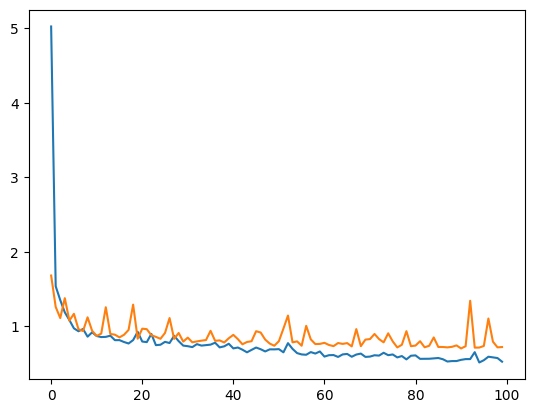

44/44 [==============================] - 0s 2ms/step


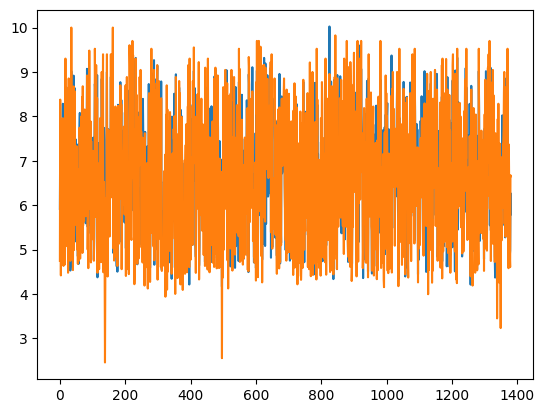

44/44 [==============================] - 0s 2ms/step
(1381, 1) (1381, 1)
trainR2: tf.Tensor(0.7514573020328879, shape=(), dtype=float64)
19/19 [==============================] - 0s 2ms/step
(593, 1) (593, 1)
testR2: tf.Tensor(0.6442600427909532, shape=(), dtype=float64)


In [9]:
cnn_input=tf.keras.Input(shape=(20,1))
cnn_1=tf.keras.layers.Conv1D(10,kernel_size=2,strides=1,activation="relu",padding='same')(cnn_input)
cnn_pool_1=tf.keras.layers.MaxPool1D(pool_size=2,strides=1,padding='same')(cnn_1)

cnn_2=tf.keras.layers.Conv1D(20,kernel_size=2,strides=1,activation="relu",padding='same')(cnn_pool_1)
cnn_pool_2=tf.keras.layers.MaxPool1D(pool_size=2,strides=1,padding='same')(cnn_2)

one=tf.keras.layers.Reshape(target_shape=(-1,))(cnn_pool_2)

network_1=tf.keras.layers.Dense(80,activation='relu')(one)
network_2=tf.keras.layers.Dense(10,activation='relu')(network_1)
outCNN=tf.keras.layers.Dense(1)(network_2)

cnn_model=tf.keras.Model(inputs=cnn_input,outputs=outCNN)
cnn_model.summary()
cnn_model.compile(optimizer='adam',loss='MSE')
cnn_history=cnn_model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))
plt.plot(cnn_history.history.get("loss"))
plt.plot(cnn_history.history.get("val_loss"))
plt.show()
plt.plot(cnn_model.predict(x_train))
plt.plot(np.array(y_train['pIC50']))
plt.show()
print("trainR2:",R_squared(np.array(y_train),cnn_model.predict(x_train)))
print("testR2:",R_squared(np.array(y_test),cnn_model.predict(x_test)))
